In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read CSV
accident_df = pd.read_csv("all.csv", encoding='windows-1254', low_memory=False)
time_df = pd.read_csv("time_bin.csv", encoding='windows-1254', low_memory=False)

In [3]:
accident_df.head()

,Unnamed: 0,Accident_Index,1st_Road_Class,Accident_Severity,Year,Date,Day_of_Week,Latitude,Light_Conditions,Local_Authority_(District),...,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Type,Was_Vehicle_Left_Hand_Drive
0,478587,201001BS70003,B,Slight,2010,11/01/2010,Monday,51.484087,Daylight,Kensington and Chelsea,...,Commuting to/from work,Mid Junction - on roundabout or on main road,CITROEN,BERLINGO FIRST 600,Petrol,Female,No tow/articulation,Turning right,Van / Goods 3.5 tonnes mgw or under,No
1,478588,201001BS70004,A,Slight,2010,11/01/2010,Monday,51.509212,Darkness - lights lit,Kensington and Chelsea,...,Journey as part of work,Mid Junction - on roundabout or on main road,RENAULT,SCENIC DYN DCI 130,Heavy oil,Male,No tow/articulation,Going ahead other,Car,No
2,478589,201001BS70007,Unclassified,Slight,2010,02/01/2010,Saturday,51.513314,Darkness - lights lit,Kensington and Chelsea,...,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,NISSAN,PRIMERA SVE CVT,Petrol,Female,No tow/articulation,Going ahead right-hand bend,Car,No
3,478590,201001BS70007,Unclassified,Slight,2010,02/01/2010,Saturday,51.513314,Darkness - lights lit,Kensington and Chelsea,...,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,MERCEDES,A140 ELEGANCE,Petrol,Female,No tow/articulation,Going ahead other,Car,No
4,478591,201001BS70008,A,Slight,2010,04/01/2010,Monday,51.484361,Darkness - lights lit,Kensington and Chelsea,...,Journey as part of work,Mid Junction - on roundabout or on main road,VAUXHALL,ZAFIRA ELEGANCE DTI,Heavy oil,Male,No tow/articulation,Turning right,Taxi/Private hire car,No


In [4]:
accident_df.shape

(1048575, 33)

In [5]:
time_df.head()

,Index,Year,Date,Day,Time,Severity,Casualties,Location,Gender,Time_f,Time_Bin
0,201001BS70003,2010,11/01/2010,Monday,07:30,Slight,1,Mid Junction - on roundabout or on main road,Female,7,Morning Commute
1,201001BS70004,2010,11/01/2010,Monday,18:35,Slight,1,Mid Junction - on roundabout or on main road,Male,18,Evening Commute
2,201001BS70007,2010,02/01/2010,Saturday,21:21,Slight,1,Mid Junction - on roundabout or on main road,Female,21,Late PM
3,201001BS70007,2010,02/01/2010,Saturday,21:21,Slight,1,Mid Junction - on roundabout or on main road,Female,21,Late PM
4,201001BS70008,2010,04/01/2010,Monday,20:35,Slight,1,Mid Junction - on roundabout or on main road,Male,20,Late PM


In [6]:
#Create DataFrame for Accidents in Birmingham
birmingham_df = accident_df.loc[accident_df['Local_Authority_(District)'] == "Birmingham"]
birmingam_df = pd.DataFrame(birmingham_df)
birmingham_df.head()

,Unnamed: 0,Accident_Index,1st_Road_Class,Accident_Severity,Year,Date,Day_of_Week,Latitude,Light_Conditions,Local_Authority_(District),...,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Type,Was_Vehicle_Left_Hand_Drive
55941,534528,201020D002713,Unclassified,Slight,2010,03/01/2010,Sunday,52.482901,Daylight,Birmingham,...,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,NISSAN,PRIMERA S TD,Heavy oil,Male,No tow/articulation,Reversing,Car,No
55942,534529,201020D004613,Unclassified,Slight,2010,02/01/2010,Saturday,52.473343,Darkness - lights lit,Birmingham,...,Other/Not known (2005-10),Not at or within 20 metres of junction,NISSAN,MICRA SLX,Petrol,Male,No tow/articulation,Parked,Car,No
55943,534530,201020D006513,Unclassified,Slight,2010,04/01/2010,Monday,52.470252,Daylight,Birmingham,...,Other/Not known (2005-10),Not at or within 20 metres of junction,PEUGEOT,206 SW XT,Petrol,Male,No tow/articulation,Waiting to go - held up,Car,No
55944,534531,201020D006913,Unclassified,Slight,2010,05/01/2010,Tuesday,52.477604,Darkness - lights lit,Birmingham,...,Other/Not known (2005-10),Approaching junction or waiting/parked at junc...,AUDI,A3 SPECIAL EDITION,Petrol,Male,No tow/articulation,Going ahead other,Car,No
55945,534532,201020D008813,Unclassified,Slight,2010,05/01/2010,Tuesday,52.484683,Darkness - lights lit,Birmingham,...,Other/Not known (2005-10),Approaching junction or waiting/parked at junc...,PEUGEOT,406 L HDI (90),Heavy oil,Male,No tow/articulation,Slowing or stopping,Car,No


In [16]:
birmingham_df.shape

(21504, 33)

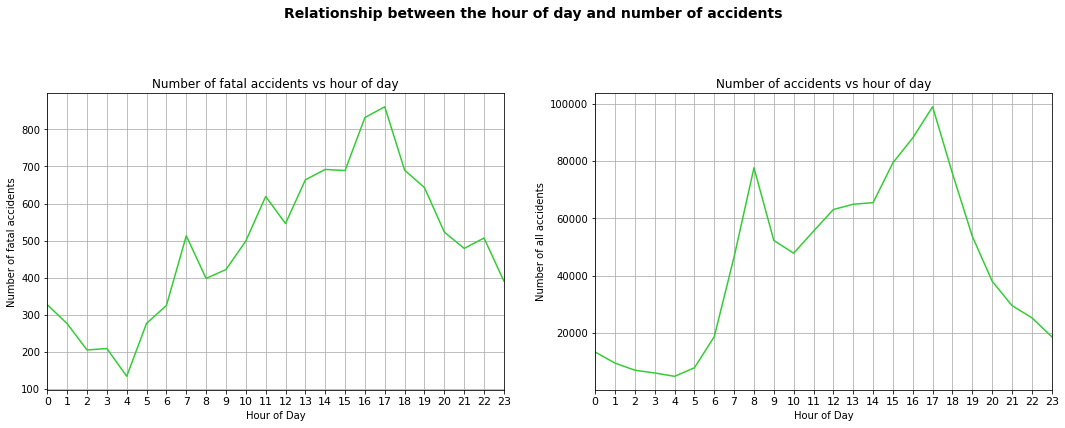

In [117]:
#Create empty lists for subplots
hour = []
num_of_fatal_acci = []
num_of_acci = []
for i in range(24):
    hour.append(i)
    num_of_fatal_acci_hour = len(time_df[(time_df['Severity'] == "Fatal") & (time_df['Time_f'] == i)])
    num_of_acci_hour = len(time_df[time_df['Time_f'] == i])
    num_of_fatal_acci.append(num_of_fatal_acci_hour)
    num_of_acci.append(num_of_acci_hour)
      
#Plot figure for fatal accidents
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(221)
ax1.plot(hour, num_of_fatal_acci, color ='limegreen')
ax1.set_ylabel('Number of fatal accidents')
ax1.set_xlabel('Hour of Day')
ax1.set_title('Number of fatal accidents vs hour of day')
plt.xticks(np.arange(len(x_axis)), x_axis, fontsize=11)
ax1.grid(True)
plt.margins(x=0)


#plot figure for all accidents
ax2 = fig.add_subplot(222)
ax2.plot(hour, num_of_acci, color = 'limegreen')
ax2.set_ylabel('Number of all accidents')
ax2.set_xlabel('Hour of Day')
ax2.set_title('Number of accidents vs hour of day')
plt.xticks(np.arange(len(x_axis)), x_axis, fontsize=11)
ax2.grid(True)
plt.margins(x=0)

fig.suptitle('Relationship between the hour of day and number of accidents', fontsize=14, fontweight='bold')
plt.show()


**Main Findings and Conclusions:**

The greatest number of fatal accidents take place at 5pm, and the greatest number of total accidents also occur at 5pm. This is presumably due to the after work commute, and where people may be tired and in a rush to get back home. There is also a peak in number of accidents at 8am where people may be commuting to work or dropping children off to school, so there will be more vehicles on the road, leading to an increased risk of accidents occuring. 
The least number of accidents including fatal accidents occur at 4am, where the least number of vehicles may be on the road.

In [8]:
#Calculate average number of casualties for speed limit
birmingham_df.groupby('Speed_limit')['Number_of_Casualties'].mean()

Speed_limit
20    1.317241
30    1.483629
40    1.615962
50    2.006061
60    1.652174
70    1.764092
Name: Number_of_Casualties, dtype: float64

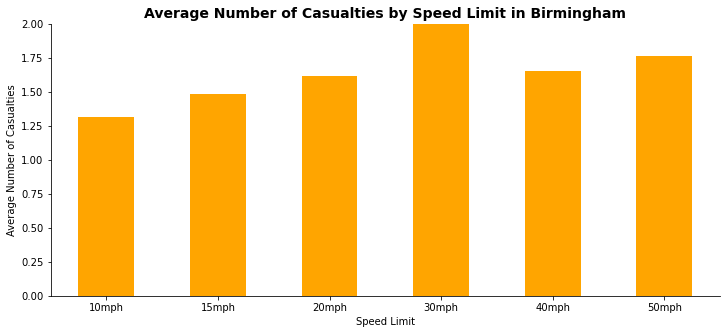

In [122]:
#Plot results for birmingham
birmingham_df.groupby('Speed_limit')['Number_of_Casualties'].mean().plot(kind='bar', color='orange', 
                                                              figsize=(12,5))
plt.xticks(np.arange(6), 
           ['10mph', '15mph', '20mph', '30mph', '40mph', '50mph'],rotation='horizontal')
plt.ylim((0.0,2.0))
plt.ylabel('Average Number of Casualties')
plt.xlabel('Speed Limit')
plt.title('Average Number of Casualties by Speed Limit in Birmingham', fontsize=14, fontweight='bold')
sns.despine(top=True, right=True);

In [18]:
accident_df.groupby('Speed_limit')['Number_of_Casualties'].mean()

Speed_limit
10    1.000000
15    1.000000
20    1.249974
30    1.359869
40    1.555876
50    1.655708
60    1.644994
70    1.827958
Name: Number_of_Casualties, dtype: float64

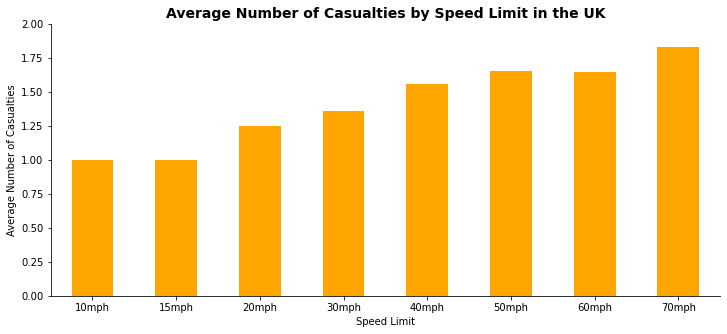

In [121]:
#Repeat graph for UK
accident_df.groupby('Speed_limit')['Number_of_Casualties'].mean().plot(kind='bar', color='orange', 
                                                              figsize=(12,5))
plt.xticks(np.arange(8), 
           ['10mph', '15mph', '20mph', '30mph', '40mph', '50mph', '60mph', '70mph'], rotation='horizontal')
plt.ylim((0.0,2.0))
plt.ylabel('Average Number of Casualties') 
plt.xlabel('Speed Limit')
plt.title('Average Number of Casualties by Speed Limit in the UK', fontsize=14, fontweight='bold')
sns.despine(top=True, right=True);

**Main Findings and Conclusions:**

From the bar plots, we can conclude that there are more average casualties resulting from accidents in 30mph zones in Birmingham. This may be due to the fact that most areas in birmingham have a 30mph speed limit, so there seems to be fewer average casualties resulting from accidnets in 40 and 50mph zones compared to 30mph.
For the whole of the UK, the greatest number of casualties occur in 70mph zones. 
Generally, for the 'Average Number of Casualties by Speed Limit in the UK'  bar plot the greater the speed limit where an accident occured the greater average number of casualties.

In [12]:
accident_df['Date']= pd.to_datetime(accident_df['Date'], format='%d/%m/%Y')

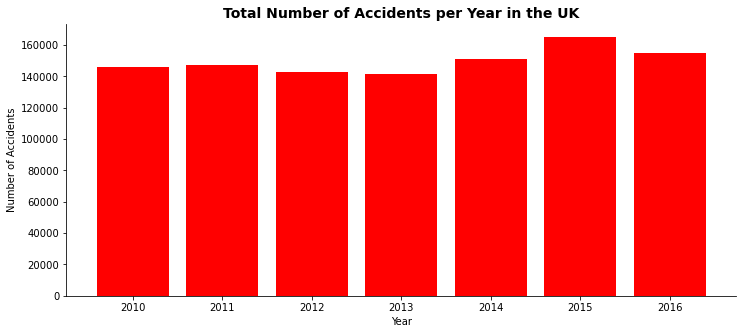

In [99]:
# Get yearly count for UK
years = accident_df['Date'].dt.year.value_counts().sort_index(ascending=False)

# Create bar graph
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(years.index, years.values, color='red')
ax.set_title('Total Number of Accidents per Year in the UK', fontsize=14, fontweight='bold')
ax.set(ylabel='Number of Accidents')
ax.set(xlabel='Year')
# Remove border
sns.despine(ax=ax, top=True, right=True);

In [100]:
birmingham_df['Date']= pd.to_datetime(birmingham_df['Date'], format='%d/%m/%Y')

<ipython-input-100-abce3ac6f834>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birmingham_df['Date']= pd.to_datetime(birmingham_df['Date'], format='%d/%m/%Y')


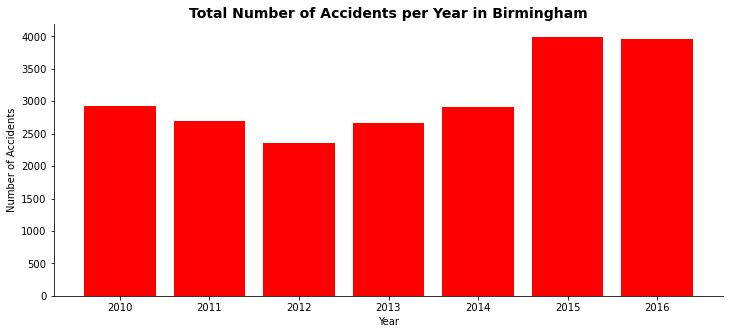

In [115]:
# Get yearly count for UK
yearly_count = birmingham_df['Date'].dt.year.value_counts().sort_index(ascending=False)

# Create bar graph
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(yearly_count.index, yearly_count.values, color='red')
ax.set_title('Total Number of Accidents per Year in Birmingham', fontsize=14, fontweight='bold')
ax.set(ylabel='Number of Accidents')
ax.set(xlabel='Year')
# Remove border
sns.despine(ax=ax, top=True, right=True);

**Main Findings and Conclusions:**

From the UK number of accidents bar plot, we can see that 2015 resulted in a slightly greater number of accidents. However, there isn't an overall significant difference in number of accidents between the plotted years.
In Birmingham, the most accidents also occurred in 2015, and there was an increase in accidents from 2012 to 2015. From 2010 to 2012 in Birmingham there was a decrease in number of accidents.

In [48]:
#Calculate casualties by hour and day and create dataframe
accidents_by_hour = time_df.groupby(['Day','Time_f']).sum()['Casualties'].to_frame().reset_index()
accidents_by_hour

,Day,Time_f,Casualties
0,Friday,0,2283
1,Friday,1,1534
2,Friday,2,1151
3,Friday,3,925
4,Friday,4,730
...,...,...,...
163,Wednesday,19,11488
164,Wednesday,20,7861
165,Wednesday,21,6063
166,Wednesday,22,5193


In [49]:
#Create pivot table of casualties, hour and day
accidents_by_hour_table = accidents_by_hour.pivot_table(values=['Casualties'], index=['Time_f'], columns=['Day'])

In [50]:
#Rename Index as hour
accidents_by_hour_table.rename_axis('Hour')

Casualties                                                  
Day      Friday Monday Saturday Sunday Thursday Tuesday Wednesday
Hour                                                             
0          2283   2061     5113   5741     2036    1634      1606
1          1534   1376     3872   4559     1145    1020       878
2          1151    778     2929   3499      794     611       632
3           925    729     2380   3033      817     625       590
4           730    651     1792   2045      603     583       574
5          1549   1537     1780   1763     1377    1460      1382
6          3844   4346     2243   2145     4134    4688      4246
7         10032  10834     4606   2607    14621   11859     12182
8         17266  19039     5642   3272    20367   20745     20666
9         10876  11472     8320   5767    11772   12663     11758
10        10144   9464    12185   9060     9465    9352      9788
11        12054  10895    16379  11994    10711   10471     10412
12        14615  12182    17634  14631    11941   11630     11887
13        15746  12583    17854  14837    12551   11726     12199
14        16539  13056    16082  14311    13309   12505     12694
15        22016  16764    14435  13538    17252   16503     17508
16        23971  19277    15017  14053    20853   19920     19936
17        23853  21343    14873  12824    23999   24023     23554
18        18857  15439    13608  11203    17411   17160     16888
19        14317   9802    11403   9290    11939   11099     11488
20        10238   7451     8429   7101     8418    7647      7861
21         7906   5594     6669   5941     6408    5955      6063
22         7137   4546     6837   4674     5672    4829      5193
23         6221   3018     6251   3489     3680    2879      3384

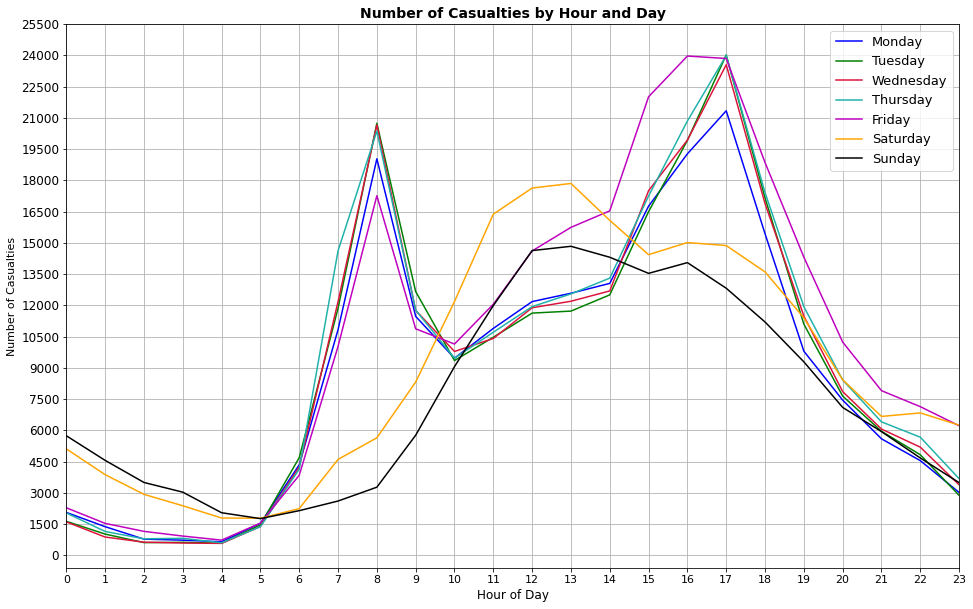

In [111]:
#Set columns as pivot table order
accidents_by_hour_table.columns = ['Friday','Monday','Saturday','Sunday', 'Thursday', 'Tuesday','Wednesday']

plt.figure(figsize=(16,10))
#Set hours as x_axis
x_axis = accidents_by_hour_table.index
#Plot days as different colours
plt.plot(x_axis, accidents_by_hour_table['Monday'], color='b', label='Monday')
plt.plot(x_axis, accidents_by_hour_table['Tuesday'], color='g', label='Tuesday')
plt.plot(x_axis, accidents_by_hour_table['Wednesday'], color='crimson', label='Wednesday')
plt.plot(x_axis, accidents_by_hour_table['Thursday'], color='lightseagreen', label='Thursday')
plt.plot(x_axis, accidents_by_hour_table['Friday'], color='m', label='Friday')
plt.plot(x_axis, accidents_by_hour_table['Saturday'], color='orange', label='Saturday')
plt.plot(x_axis, accidents_by_hour_table['Sunday'], color='k', label='Sunday')

# Set y-axis
y_max = 25500
step = 1500
y_axis = np.arange(0, y_max+step, step)

# Format axes and set labels
plt.xticks(np.arange(len(x_axis)), x_axis, fontsize=11)
plt.yticks(y_axis, y_axis, fontsize=12)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Casualties', fontsize=11)
plt.margins(x=0)
plt.grid(True)
#Plot legend and title
plt.legend(fontsize=13, loc='best')
plt.title("Number of Casualties by Hour and Day", fontsize=14, fontweight='bold')
plt.show()

**Main Findings and Conclusions:**

The weekdays Monday to Thurday follow the same trend where there is a spike in number of casualties at 8am and also again at 5pm. Friday also follows this trend however, seems to have a greater number of casualties from 10am until 4pm where it reaches a peak. This increase could be due to these hours being the time whn people are often commuting too and from work.
The number of casualties vs the hour of day follows a different trend on saturday and sundays in comparison with weekdays. This is expected as not many people will be working on the weekend, which may mean a reduced number of vehicles on the road. The greatest number of causalties on the weekend are between the hours of 11am and 1pm, as opposed to 8am and 5pm on weekdays. 